# Study impact of Beam-charge normalization
last edit Sep-12, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [3]:
load_SIDIS_data( Nruns = -1,
                do_e_e_pi=True, 
                do_e_e_pi_n=False, 
                do_e_e_pi_FreeP=False,
                fdebug=1, do_all_vars=True)

Done loading files.

Total statistics:
17964852  d(e,e'π+)  events
7459373  d(e,e'π-)  events


# (2) Apply selection cuts not previously imposed
Except from $W$ cut

In [4]:
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=True, 
                                                              fdebug=2,                                                               
                                                              NeventsMax=-1);

Applying selection cuts not previously imposed
(1) d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 17964852 events
Subdividing into 35 subsets up to 500000 events
subset 0 of index 0-499999
subset 1 of index 500000-999999
subset 2 of index 1000000-1499999
subset 3 of index 1500000-1999999
subset 4 of index 2000000-2499999
subset 5 of index 2500000-2999999
subset 6 of index 3000000-3499999
subset 7 of index 3500000-3999999
subset 8 of index 4000000-4499999
subset 9 of index 4500000-4999999
subset 10 of index 5000000-5499999
subset 11 of index 5500000-5999999
subset 12 of index 6000000-6499999
subset 13 of index 6500000-6999999
subset 14 of index 7000000-7499999
subset 15 of index 7500000-7999999
subset 16 of index 8000000-8499999
subset 17 of index 8500000-8999999
subset 18 of index 9000000-9499999
subset 19 of index 9500000-9999999
subset 20 of index 10000000-10499999
subset 21 of index 10500000-10999999
subset 22 of ind

# (3) plot beam-charge vs. run number

In [5]:
runs = read_run_nunmbers(runs_filename  = "good_runs_10-2-final.txt")
charge_df = pd.DataFrame()
for run in runs:
    charge_df = pd.concat([charge_df,
                           pd.read_csv('/Users/erezcohen/Desktop/data/BAND/metaData/beam_charge_00%d.csv'%run)])
charge_df
charge_df[['runnum','beam_charge']].to_csv('/Users/erezcohen/Desktop/data/BAND/metaData/beam_charge_all_runs.csv')

<AxesSubplot:xlabel='run number', ylabel='Beam charge [mC]'>

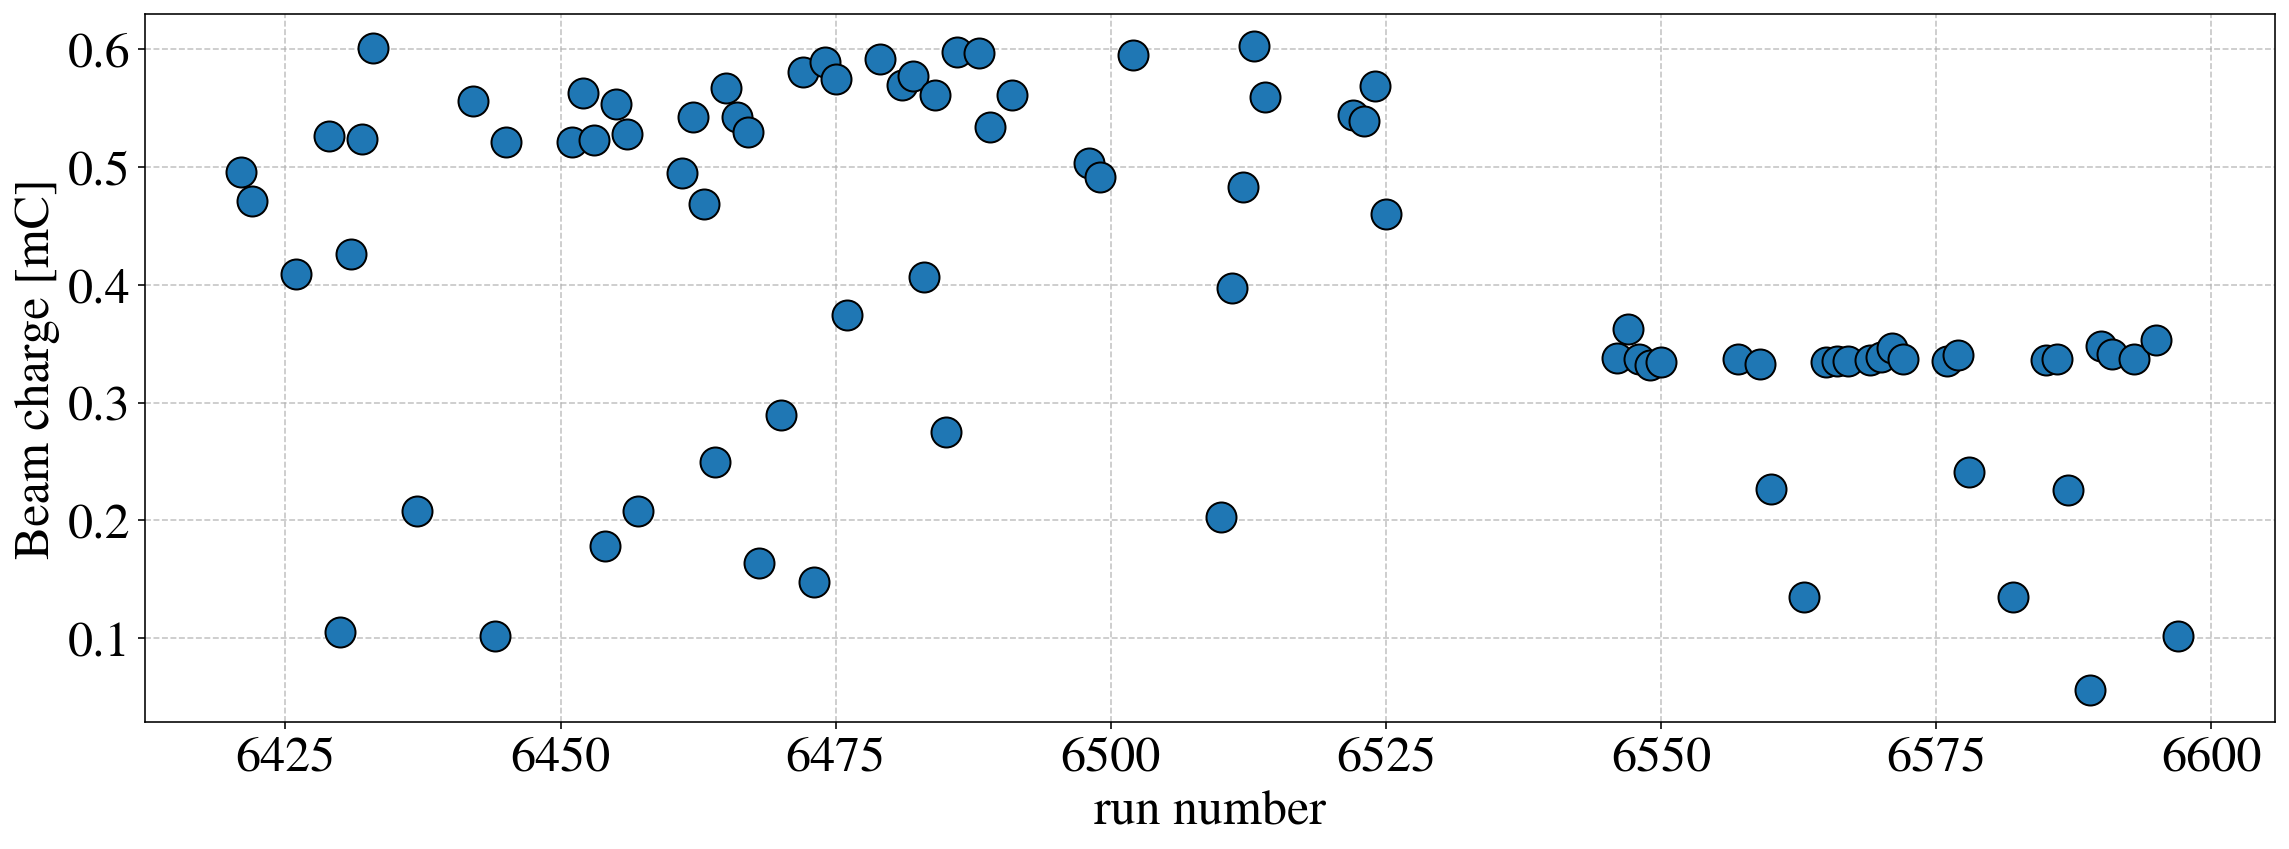

In [6]:
fig = plt.figure(figsize=(16,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

plt.plot(charge_df.runnum, charge_df.beam_charge*1e-6,  markersize=15 ,marker='o',markeredgecolor='k',linestyle='None')

set_axes(ax,'run number', "Beam charge [mC]", do_add_grid=True, do_add_legend=False)
# ax.legend(loc='lower right',fontsize=24);

# (4) Extract tabular data and save results to file with and without beam-charge normalization

In [7]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))    
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"

x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


<!-- ## (4.1) Without beam-charge normalization -->

In [8]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                    data_path= '/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/',
                    x_var    = var ,                           
                    x_bins   = x_bins,                           
                    z_bins   = z_bins,                           
                    z_widths = z_widths,   
                    weight_option=None,                        
                    fdebug   = 0,
                    prefix   = 'Untagged_SIDIS_ratio_',                           
                    suffix   = 'No_beam_charge_normalization')

saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310No_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360No_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410No_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460No_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510No_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_rati

In [9]:
# prefix = 'Untagged_SIDIS_ratio_'
# suffix = 'No_beam_charge_normalization'
# SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True,
#                                  data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/')

<!-- ## (4.2) With beam charge normalization -->

<!-- ### (4.2.2) Extract cross-section ratio weighterd by beam-charge -->

In [10]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                    data_path= '/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/',
                    x_var    = var ,                           
                    x_bins   = x_bins,                           
                    z_bins   = z_bins,                           
                    z_widths = z_widths,
                    fdebug   = 0,
                    weight_option='beam-charge' ,
                    prefix   = 'Untagged_SIDIS_ratio_',                           
                    suffix   = 'With_beam_charge_normalization')

saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310With_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360With_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410With_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460With_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510With_beam_charge_normalization.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/Untagged_

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:144: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:145: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:146: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


In [11]:
# prefix = 'Untagged_SIDIS_ratio_'
# suffix = 'With_beam_charge_normalization'
# SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True,
#                                  data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/')


## (4.3) Compare with and without beam-charge normalization

In [12]:
SIDIS_res = dict()
prefix = 'Untagged_SIDIS_ratio_'
for suffix in ['No_beam_charge_normalization','With_beam_charge_normalization']:
    SIDIS_res[suffix] = load_SIDIS_ratio(prefix = prefix, suffix = suffix, 
                                         doPlotResults=False, 
                                         data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/')
print('Done.')

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfBeamChargeNormalization/
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510No_beam_charge_normalization.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips

In [13]:
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for suffix in ['No_beam_charge_normalization','With_beam_charge_normalization']:
    # print(suffix)
    results = SIDIS_res[suffix]
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        # print(key)
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        # print(z_min,'<z<',z_max)
        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        # print(results[key])
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        # print(R,dR_up,dR_dw)
        
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )
        
print('Done.')

Done.


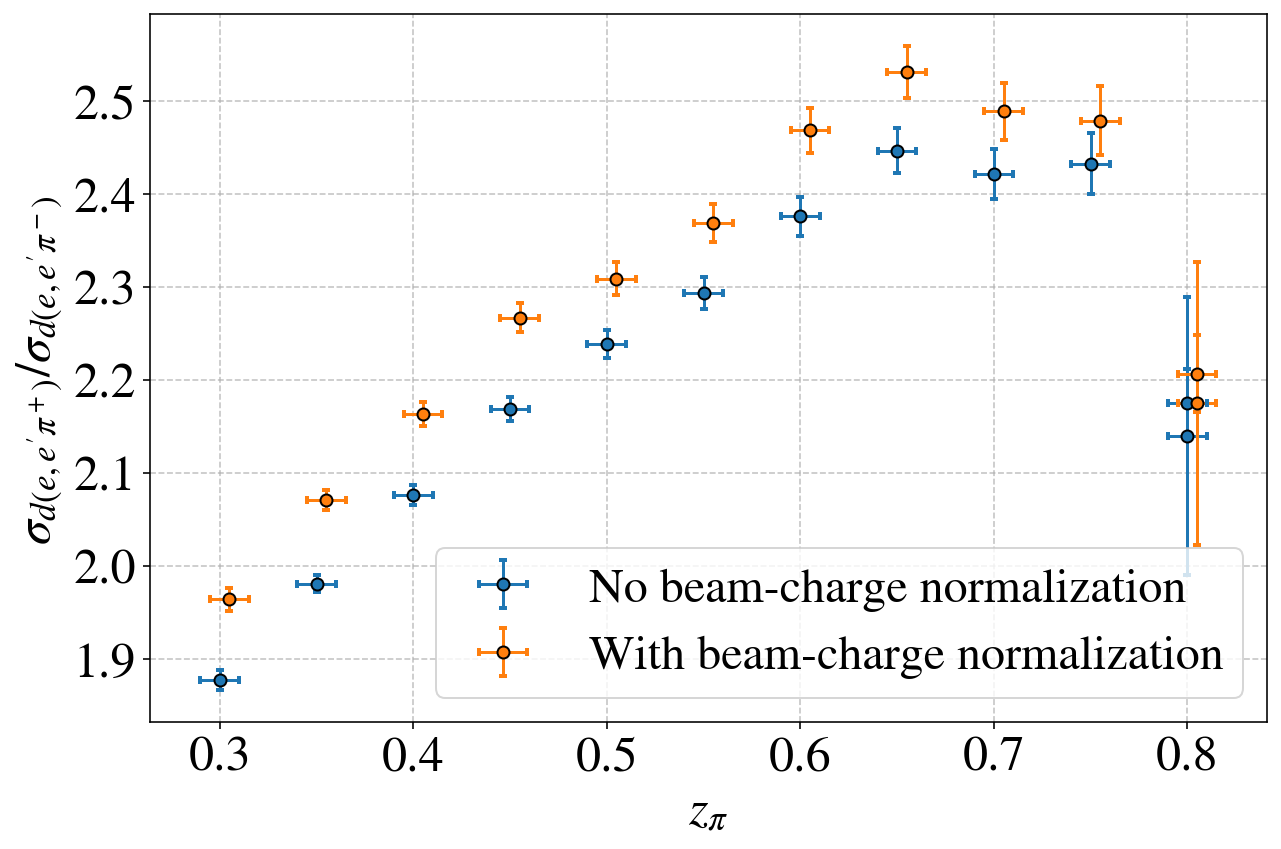

In [14]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for suffix,sufname,sufidx in zip(['No_beam_charge_normalization','With_beam_charge_normalization'],
                                 ['No beam-charge normalization','With beam-charge normalization'],
                                 [0,1]):
    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.005, xerr=z_err_arr[suffix],
                 y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=sufname, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',
             "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             do_add_grid=True, do_add_legend=True)
ax.legend(loc='lower right',fontsize=24);